In [59]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

In [60]:
bankNote=pd.read_csv('banknote.csv')
car=pd.read_csv('car.csv')
bankNote=shuffle(bankNote)

In [4]:
from scipy.io import arff
import pandas as pd

In [5]:
data = arff.loadarff('emotions.arff')
df = pd.DataFrame(data[0])
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


In [6]:
#Import the keras model and dense layer
from keras.models import Sequential
from keras.layers import Dense

In [61]:
X=bankNote.drop('class', axis=1).values
y=bankNote['class'].values

In [62]:
# First we will create model for bank note dataset
# this is a binary dataset
model=Sequential()
model.add(Dense(2, input_shape=(4,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics='accuracy')
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 2)                 10        
                                                                 
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X,y, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 [==============================] - 3s 26ms/step - loss: 1.4323 - accuracy: 0.5059 - val_loss: 1.1733 - val_accuracy: 0.5236
Epoch 2/10
35/35 [==============================] - 0s 11ms/step - loss: 1.2062 - accuracy: 0.5178 - val_loss: 0.9912 - val_accuracy: 0.5309
Epoch 3/10
35/35 [==============================] - 0s 4ms/step - loss: 1.0180 - accuracy: 0.5378 - val_loss: 0.8446 - val_accuracy: 0.5418
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.8698 - accuracy: 0.5624 - val_loss: 0.7328 - val_accuracy: 0.5818
Epoch 5/10
35/35 [==============================] - 0s 4ms/step - loss: 0.7609 - accuracy: 0.5825 - val_loss: 0.6560 - val_accuracy: 0.5818
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.6026 - val_loss: 0.5986 - val_accuracy: 0.6000
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6228 - accuracy: 0.6190 - val_loss: 0.5601 - val_accuracy: 0.6291
Epoch 8/10
35/35 [

In [19]:
model.evaluate(X,y)

43/43 [==============================] - 0s 950us/step - loss: 0.6125


0.6124641299247742

In [27]:
#preparing the dataset
emotions=pd.read_csv('emotions_out.csv')
X=emotions.drop(columns=['amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely','angry-aggresive']).values
y=emotions[['amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely','angry-aggresive']].values

In [30]:
emotions.shape

(593, 78)

In [45]:
# Secondly we will create model for emotions dataset
# this is a categorical dataset
model=Sequential()
model.add(Dense(25, input_shape=(72,), activation="tanh"))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(6, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics='accuracy')
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 25)                1825      
                                                                 
 dense_23 (Dense)            (None, 20)                520       
                                                                 
 dense_24 (Dense)            (None, 15)                315       
                                                                 
 dense_25 (Dense)            (None, 6)                 96        
                                                                 
Total params: 2,756
Trainable params: 2,756
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 3.3027 - accuracy: 0.3333 - val_loss: 3.4494 - val_accuracy: 0.2773
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 3.3032 - accuracy: 0.2954 - val_loss: 3.4482 - val_accuracy: 0.2773
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 3.3029 - accuracy: 0.3080 - val_loss: 3.4471 - val_accuracy: 0.3445
Epoch 4/100
15/15 [==============================] - 0s 14ms/step - loss: 3.3032 - accuracy: 0.3861 - val_loss: 3.4462 - val_accuracy: 0.3109
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 3.3038 - accuracy: 0.3249 - val_loss: 3.4451 - val_accuracy: 0.2941
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 3.3015 - accuracy: 0.2869 - val_loss: 3.4433 - val_accuracy: 0.2941
Epoch 7/100
15/15 [==============================] - 0s 13ms/step - loss: 3.3010 - accuracy: 0.2869 - val_loss: 3.4421 - val_accuracy: 0.2941
Epoch 8/

In [48]:
# Lastly we will create model for multi label
# this is a categorical dataset
model=Sequential()
model.add(Dense(25, input_shape=(72,), activation="tanh"))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(6, activation="sigmoid"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics='accuracy')
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 25)                1825      
                                                                 
 dense_27 (Dense)            (None, 20)                520       
                                                                 
 dense_28 (Dense)            (None, 15)                315       
                                                                 
 dense_29 (Dense)            (None, 6)                 96        
                                                                 
Total params: 2,756
Trainable params: 2,756
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X,y, epochs=20)

Epoch 1/20
19/19 [==============================] - 1s 5ms/step - loss: 3.4693 - accuracy: 0.1214
Epoch 2/20
19/19 [==============================] - 0s 5ms/step - loss: 3.4178 - accuracy: 0.1079
Epoch 3/20
19/19 [==============================] - 0s 5ms/step - loss: 3.3895 - accuracy: 0.0556
Epoch 4/20
19/19 [==============================] - 0s 5ms/step - loss: 3.3753 - accuracy: 0.0405
Epoch 5/20
19/19 [==============================] - 0s 5ms/step - loss: 3.3671 - accuracy: 0.0405
Epoch 6/20
19/19 [==============================] - 0s 6ms/step - loss: 3.3647 - accuracy: 0.0405
Epoch 7/20
19/19 [==============================] - 0s 4ms/step - loss: 3.3625 - accuracy: 0.0624
Epoch 8/20
19/19 [==============================] - 0s 4ms/step - loss: 3.3640 - accuracy: 0.1720
Epoch 9/20
19/19 [==============================] - 0s 3ms/step - loss: 3.3575 - accuracy: 0.2901
Epoch 10/20
19/19 [==============================] - 0s 3ms/step - loss: 3.3529 - accuracy: 0.2901
Epoch 11/20
19/19 [

## Keras Call backs

In [64]:
bankNote=pd.read_csv('banknote.csv')
car=pd.read_csv('car.csv')
bankNote=shuffle(bankNote)
X=bankNote.drop('class', axis=1).values
y=bankNote['class'].values

# First we will create model for bank note dataset
# this is a binary dataset
model=Sequential()
model.add(Dense(2, input_shape=(4,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics='accuracy')
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 2)                 10        
                                                                 
 dense_41 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [73]:
history=model.fit(X, y, epochs=20, validation_split=0.3)
print(history.history['accuracy'])

Epoch 1/20
30/30 [==============================] - 1s 8ms/step - loss: 0.1518 - accuracy: 0.9854 - val_loss: 0.1758 - val_accuracy: 0.9854
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1494 - accuracy: 0.9854 - val_loss: 0.1729 - val_accuracy: 0.9854
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9865 - val_loss: 0.1701 - val_accuracy: 0.9879
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1447 - accuracy: 0.9854 - val_loss: 0.1675 - val_accuracy: 0.9879
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1425 - accuracy: 0.9865 - val_loss: 0.1646 - val_accuracy: 0.9903
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1402 - accuracy: 0.9865 - val_loss: 0.1620 - val_accuracy: 0.9903
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1381 - accuracy: 0.9865 - val_loss: 0.1597 - val_accuracy: 0.9903
Epoch 8/20
30/30 

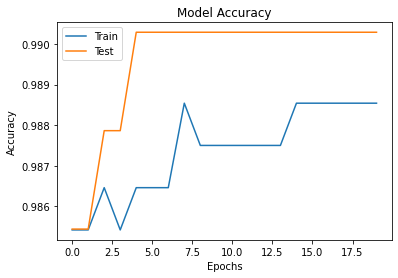

In [74]:
# we can print acc, val_loss, val_acc
#now lets plot the graphs of accuracy

import matplotlib.pyplot as plt

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'])
plt.show()